<a href="https://colab.research.google.com/github/christmasv/Proyectos-de-ML/blob/Clasificacion-Aprendizaje-Supervisado/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo 2

Este modelo clasifica radiografías de tórax en:
* COVID-19
* Normal (sano)
* Bacteriana

Los datos para entrenar, validar y testear el modelo se toman de Google Drive, montándolo previamente.

Alternativamente se puede descargar un archivo .pickle donde han sido cargados estos datos previamente.

# Todo comienza con un Pixel

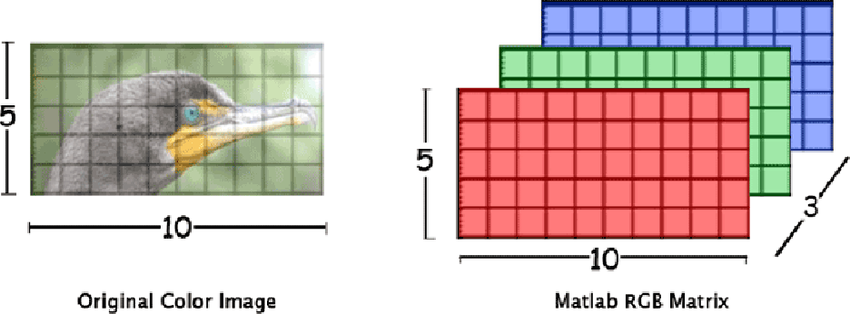

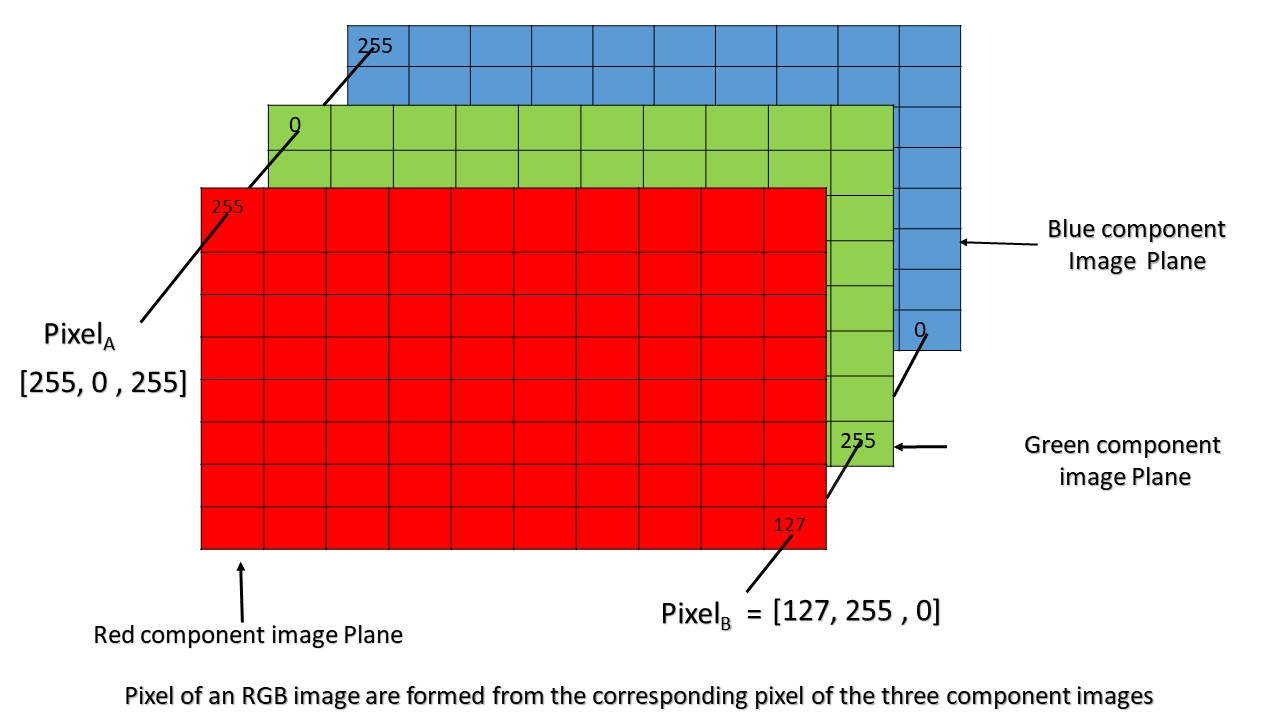

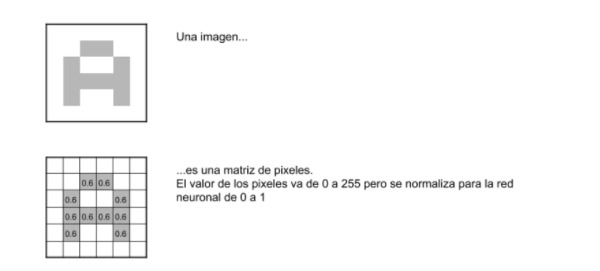

# Imágenes a color

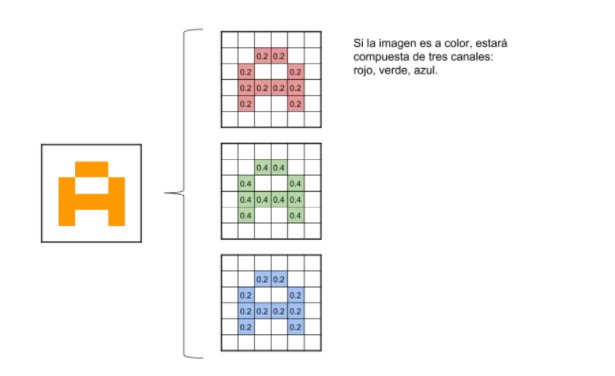

# Una convolución
Matrices más pequeñas

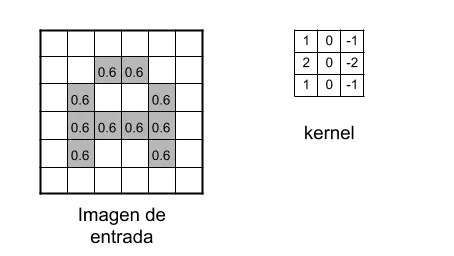

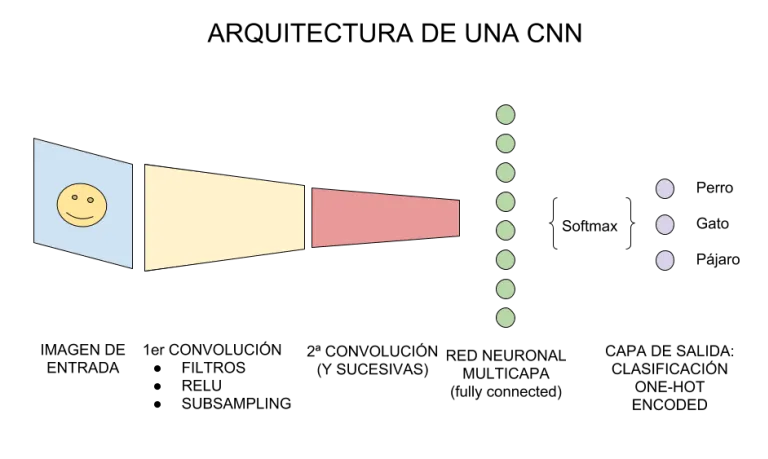

https://www.juanbarrios.com/redes-neurales-convolucionales/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# DL
import tensorflow as tf

# Image
from PIL import Image
import pickle

# General
import glob
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

# Carga de Datos

#### Load images from pickle

In [ ]:
# If executed, below section 'Get images from files' is not needed

with open("/content/drive/MyDrive/iebs/Final/train.pickle", 'rb') as f:
    labels, images = pickle.load(f)

In [ ]:
images.shape, len(labels)

#### Get images from files

In [ ]:
COVID_PATH = "/content/drive/MyDrive/iebs/Final/train/bacterial/"
NORMAL_PATH = "/content/drive/MyDrive/iebs/Final/train/covid/"
VIRAL_PATH = "/content/drive/MyDrive/iebs/Final/train/normal/"

file_filter = "*" # ('*.jpg', '*.jpeg', '*.png') # alternatively loop though the tuple
covid_fpaths = glob.glob(COVID_PATH + file_filter)
normal_fpaths = glob.glob(NORMAL_PATH + file_filter)
viral_fpaths = glob.glob(VIRAL_PATH + file_filter)

fpaths = covid_fpaths + normal_fpaths + viral_fpaths
labels = [0]*len(covid_fpaths) + [1]*len(normal_fpaths) + [2]*len(viral_fpaths)

#La etiqueta de radiografías de COVID-19 es 0, las de radiografías normales es 1 y radiografías bacterianas es 2
print(len(covid_fpaths), 'Covid Images')
print(len(normal_fpaths), 'Normal Images')
print(len(viral_fpaths), 'Bacterial Images')

In [ ]:
## Target Parameters
height = 256 # pixels
width = 256 # pixels

images = []
for fpath in fpaths:

    img = Image.open(fpath)
    if img.size != (width, height):
        # resize
        img = img.resize((width, height), Image.ANTIALIAS)
    if img.mode != "L":
        # to black and white
        img = img.convert(mode="L")

    img_array = np.asarray(img)
    images.append(img_array)

images = np.asarray(images)
images = images / 255.0

In [ ]:
images.shape, len(labels)

##### Save images to pickle

In [ ]:
with open('/content/drive/MyDrive/iebs/Final/trainimages.pickle', 'wb') as f:
    pickle.dump([labels, images], f)

# Model

#### Train - Test Split

In [ ]:
X = images
y = np.array(labels)

##### Shuffle

In [ ]:
X, y = shuffle(X, y, random_state = 42)
X = X.reshape(-1, 256, 256, 1)

from keras.utils import np_utils
y__ = np_utils.to_categorical(y, 3)

In [ ]:
test_split = .2

test_index = int(len(y)*test_split)

X_test = X[:test_index]
y_test = y__[:test_index]

X_train = X[test_index:]
y_train = y__[test_index:]

print('Shape of x_train:', X_train.shape)
print('Shape of y_train:', len(y_train))
print('Shape of x_test:', X_test.shape)
print('Shape of y_test:', len(y_test))

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adamax
from keras import backend
from keras.utils import np_utils
from tensorflow.keras.datasets import cifar10
from keras.callbacks import EarlyStopping


In [ ]:
model = tf.keras.models.Sequential(
     [
         tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (256,256,1)),
         tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
         tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
         tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
         tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(64, activation = 'relu'),
         tf.keras.layers.Dense(32, activation='relu'),
         tf.keras.layers.Dense(16, activation='relu'),
         tf.keras.layers.Dense(3, activation = 'softmax')
     ]
 )


# definimos el optimizador
opt = tf.keras.optimizers.Adamax(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# visualizamos modelo
model.summary()

In [ ]:
# test= 20%, validation es 25% del entrenamiento
hist = model.fit(X_train, y_train, validation_split = 0.25, epochs=10)

In [ ]:
score = model.evaluate(X_test, y_test)
print("Test accuracy: :", score[1])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/iebs/Final/my_model2.h5')

In [ ]:
X_test[0].shape

In [ ]:
X_test[0].reshape(-1,256,256,1)

In [ ]:
model.predict(X_test[0].reshape(-1,256,256,1))

In [ ]:
y_test[0]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#En esta sección se desarrolla una matriz de confusión para valorar la sensibilidad y especificidad del modelo.
y_true=y_test[0:200]
y_pred= model.predict(X_test[0:200].reshape(-1,256,256,1))
y_pred=np.rint(y_pred)
y_true=np.argmax(y_true,axis=1)
y_pred=np.argmax(y_pred,axis=1)
confusion_matrix(y_true, y_pred,labels=[0,1,2])


In [ ]:
#En esta sección se evalúa la precisión del modelo con las imágenes previamente separadas en el set de test.
model.evaluate(X_test[:200], y_test[:200])[1]

In [ ]:
from tensorflow import keras

In [ ]:
learn = keras.models.load_model('/content/drive/MyDrive/iebs/Final/my_model2.h5')

In [ ]:
learn.predict(X_test[10].reshape(-1,256,256,1))

https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es-419

**Pruebo con una imagen**

In [ ]:
image_file = "/content/drive/MyDrive/iebs/Final/test/covid/COVID (1000).png"

In [ ]:
image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)

In [ ]:
class_names = ["COVID-19","Normal","Bacteriana"]
img_height = 256
img_width = 256

In [ ]:
img = keras.preprocessing.image.load_img(image_file, target_size=(img_height, img_width),color_mode="grayscale")
img_array = keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.
img_array = img_array.reshape(-1, 256, 256, 1)

In [ ]:
predictions = learn.predict(img_array)
score = tf.nn.softmax(predictions)

In [ ]:
score

In [ ]:
pred = str(class_names[np.argmax(score)])
probabilidad = str( 100 * np.max(score))
texto = "Predición: " + pred +"; " + " Probabilidad: " + probabilidad
print(texto)